#### PARTIE 2 : Prédiction des prix de location

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
dataset = pd.read_csv('get_around_pricing_project.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [3]:
dataset.isna().sum()


model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

## partie ML : REGRESSION LINEAIRE

In [4]:
# Seperate target variable y from features X:
target_variable = ['rental_price_per_day']
print('Separating labels from features...')
y = dataset.loc[:,target_variable]
X = dataset.drop(target_variable, axis = 1)
print('...Done')
print()
print('y:')
print(y.head())
print()
print('X:')
print(X.head())
print()

Separating labels from features...
...Done

y:
   rental_price_per_day
0                   106
1                   264
2                   101
3                   158
4                   183

X:
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False       

In [5]:
print('Dividing into train set and test set...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('...Done')
print()

Dividing into train set and test set...
...Done



In [6]:
dataset.dtypes


model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object

In [7]:
# Distinguish numeric and categorical features:
numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

# Create pipeline for numeric features:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [8]:
# Preprocessings on train set:
print('Performing preprocessings on train set...')
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done')
print(X_train[0:5])
print()


Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color car_type  \
4550       BMW   132485           135  diesel       white      suv   
1237   Citroën   131121           135  diesel       black   estate   
3158   Renault   209216           135  diesel        grey    sedan   
900    Peugeot   148986           100  diesel       black   estate   
933    Citroën   170500           135  diesel       black   estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
4550                       True     True                 False          False   
1237                      False     True                 False          False   
3158                       True     True                 False          False   
900                        True     True                 False          False   
933                        True     True                 False          False   

      has_getaround_connect  has_speed_regulator  

In [9]:
# Preprocessings on test set:
print('Performing preprocessings on test set:')
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done')
print(X_test[0:5])
print()

Performing preprocessings on test set:
     model_key  mileage  engine_power    fuel paint_color   car_type  \
1621   Renault   193231            85  diesel       black     estate   
4098       BMW    69362           135  diesel        grey        suv   
3135      Audi   321498           170  diesel        blue      sedan   
1861   Citroën   192063            90  diesel       black  hatchback   
1571   Peugeot   164659           100  diesel       white     estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1621                      False     True                 False          False   
4098                       True     True                 False           True   
3135                       True     True                  True          False   
1861                      False    False                 False          False   
1571                       True     True                 False          False   

      has_getaround_connect  has_speed_re

c:\Users\walid\Documents\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [10]:
# Model training:
baseline = LinearRegression()
print('Training model...')
baseline.fit(X_train, y_train)
print('...Done')

Training model...
...Done


In [11]:
# Predictions on training set:
print('Prediction on training set...')
y_train_pred = baseline.predict(X_train)
print('...Done')
print(y_train_pred[0:5])
print()

Prediction on training set...
...Done
[[132.11478176]
 [118.97967388]
 [118.29212235]
 [101.04453758]
 [104.69672123]]



In [12]:
# Predictions on test set:
print('Prediction on test set...')
y_test_pred = baseline.predict(X_test)
print('...Done')
print(y_test_pred[0:5])
print()

Prediction on test set...
...Done
[[ 91.36921014]
 [157.5651874 ]
 [105.17960609]
 [ 72.22064487]
 [100.58727665]]



In [13]:
r2 = baseline.score(X_train, y_train)
r2_test = baseline.score(X_test, y_test)
mse = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [14]:
print('BASELINE, R2 score on train set:', baseline.score(X_train, y_train))
print('BASELINE, R2 score on test set:', baseline.score(X_test, y_test))
print()
print("BASELINE, MSE score on train set : ", mse)
print("BASELINE, MSE score on test set : ", mse_test)
print()
print("BASELINE, RMSE score on train set : ", np.sqrt(mse))
print("BASELINE, RMSE score on test set : ", np.sqrt(mse_test))

BASELINE, R2 score on train set: 0.7156703436007354
BASELINE, R2 score on test set: 0.6892822414219673

BASELINE, MSE score on train set :  323.212846390203
BASELINE, MSE score on test set :  337.41830119841796

BASELINE, RMSE score on train set :  17.978121325383334
BASELINE, RMSE score on test set :  18.36894937655439


BASELINE, R2 score on train set: 0.7156703436007354
BASELINE, R2 score on test set: 0.6892822414219673

In [15]:
feature_names_out = preprocessor.get_feature_names_out()
feature_names = [fname for fname in feature_names_out]
coefs = pd.DataFrame(index = feature_names, data = baseline.coef_.transpose(), columns=["coefficients"])

In [16]:
feature_importance = coefs.sort_values(by='coefficients', ascending=False)

In [17]:
feature_importance_abs = abs(coefs).sort_values(by='coefficients', ascending=False)
feature_importance_abs = feature_importance_abs.transpose()
feature_importance_abs

,cat__model_key_Honda,cat__model_key_Suzuki,cat__fuel_hybrid_petrol,cat__model_key_Maserati,cat__model_key_Yamaha,cat__model_key_SEAT,cat__model_key_Fiat,cat__model_key_Toyota,cat__car_type_van,cat__model_key_Opel,...,cat__paint_color_red,cat__car_type_sedan,cat__model_key_Nissan,cat__paint_color_brown,cat__paint_color_blue,cat__has_air_conditioning_True,cat__private_parking_available_True,cat__model_key_Lamborghini,cat__paint_color_black,cat__paint_color_grey
coefficients,63.341486,40.058804,38.533723,36.695844,36.526594,34.294367,32.964872,28.045736,26.01993,24.431298,...,3.013689,2.64988,2.385715,2.229495,1.925508,1.19843,0.645288,0.562754,0.476999,0.410985


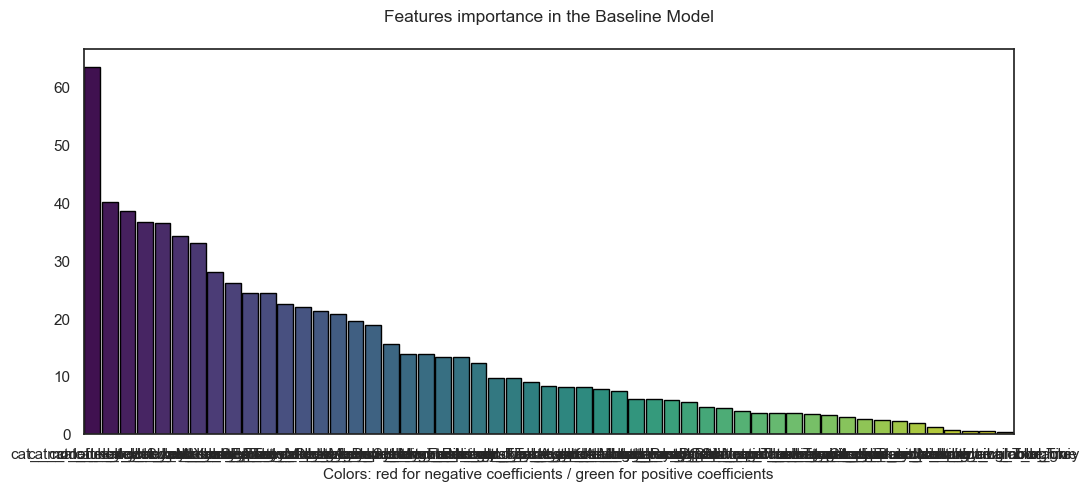

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example with built-in palette
sns.set(rc={'figure.figsize': (12, 5)}, style='white')
sns.barplot(data=feature_importance_abs, orient='v', palette='viridis', width=.9, edgecolor='black')
plt.title('Features importance in the Baseline Model', fontsize=12.5, pad=20)
plt.xlabel('Colors: red for negative coefficients / green for positive coefficients', fontsize=11)
plt.show()


### Dans la partie modèle_xgb nous t'entterons d'avoir un meilleur R2 scrore....